### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

### Getting Data

In [2]:
df = pd.read_csv('datatraining.csv')
#df=df.head(5000)
#df['date'] = df['date'].str.slice(start=11)
#df['date'] = df['date'].apply(lambda x: timeToNum(x))
df=df.drop(columns=["id","date"])

In [3]:
df.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1
1,23.15,27.2675,429.5,714.00,0.004783,1
2,23.15,27.2450,426.0,713.50,0.004779,1
3,23.15,27.2000,426.0,708.25,0.004772,1
4,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 381.8 KB
Number of duplicated rows is:  867
Number of rows with NaNs is:  0


### Exploratory Data Analysis

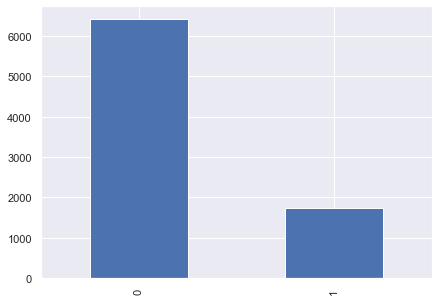

In [5]:
df['Occupancy'].value_counts().plot(kind='bar')
plt.ylabel('')
plt.show()

##### Extracting Attribute Matrix

In [7]:
X = df.drop(columns=['Occupancy'])
X.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.18,27.2720,426.0,721.25,0.004793
1,23.15,27.2675,429.5,714.00,0.004783
2,23.15,27.2450,426.0,713.50,0.004779
3,23.15,27.2000,426.0,708.25,0.004772
4,23.10,27.2000,426.0,704.50,0.004757


##### Standardize the Data

In [8]:
# Generates a Standardized matrix with mean zero and standard deviation is 1

Xs = StandardScaler().fit_transform(X)  
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.518470,0.278526,1.573763,0.364948,1.091757
1,2.488967,0.277713,1.591735,0.341881,1.080555
2,2.488967,0.273645,1.573763,0.340290,1.075888
3,2.488967,0.265508,1.573763,0.323587,1.066555
4,2.439796,0.265508,1.573763,0.311655,1.049523


In [9]:
X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,8.143000e+03,8.143000e+03,8.143000e+03,8.143000e+03,8.143000e+03
mean,7.818326e-16,4.467615e-16,2.233807e-16,-1.884775e-16,1.116904e-16
std,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00
min,-1.592248e+00,-1.624791e+00,-6.137261e-01,-6.165933e-01,-1.394355e+00
25%,-9.038502e-01,-1.000115e+00,-6.137261e-01,-5.330748e-01,-9.201475e-01
50%,-2.252867e-01,8.877312e-02,-6.137261e-01,-4.869407e-01,-7.243751e-02
75%,7.581387e-01,8.681862e-01,7.027469e-01,1.027265e-01,5.742528e-01
max,2.518470e+00,2.420232e+00,7.326619e+00,4.524170e+00,3.066492e+00


##### Box and Whisker Plots

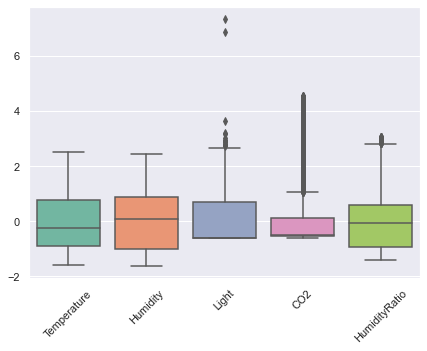

In [10]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

##### Correlation Matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Temperature'),
  Text(0, 1.5, 'Humidity'),
  Text(0, 2.5, 'Light'),
  Text(0, 3.5, 'CO2'),
  Text(0, 4.5, 'HumidityRatio')])

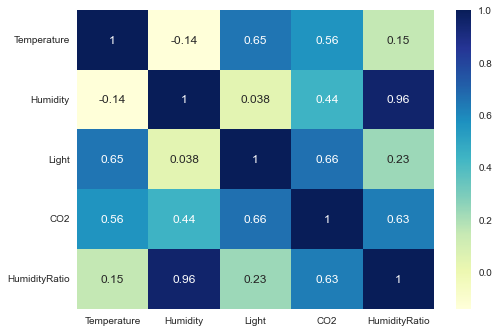

In [56]:
sns.heatmap(X.corr(), cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

##### Pair Plot

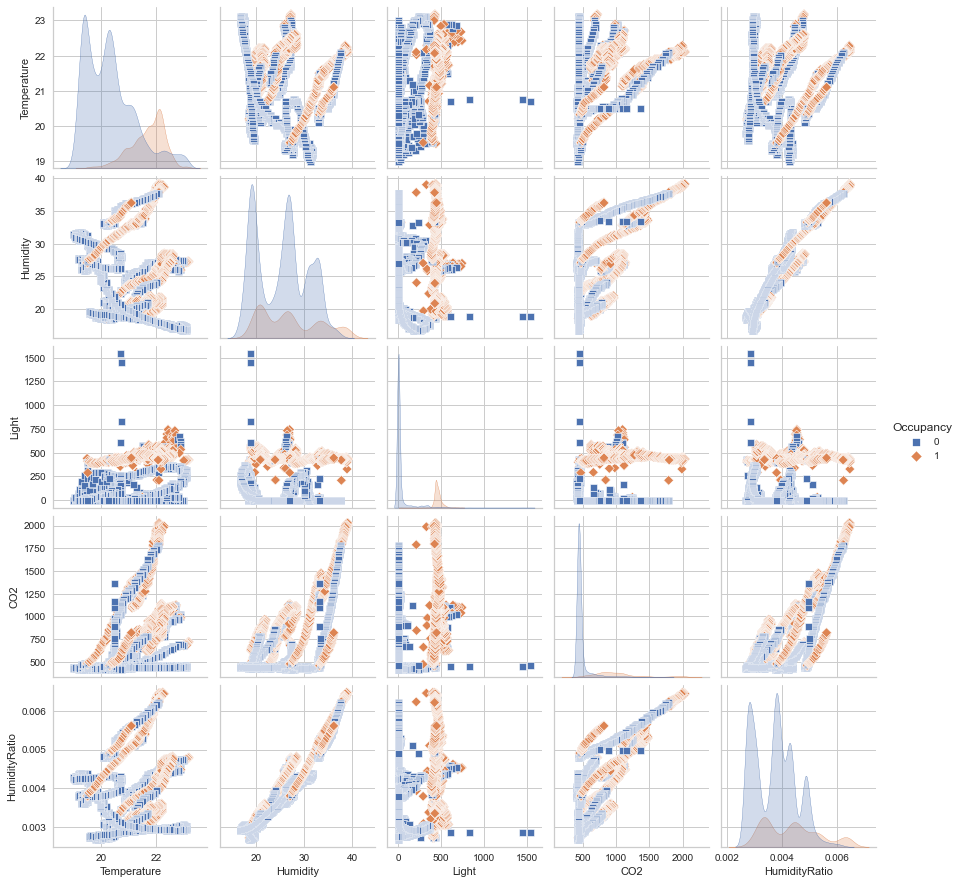

In [57]:
sns.pairplot(df, hue='Occupancy', markers=["s", "D"], kind="scatter")
plt.show()

### Principal Component Analysis

In [12]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


##### PCs

In [13]:
out['PC']

,PC1,PC2,PC3
0,2.375810,1.481548,-0.913234
1,2.354485,1.476060,-0.880672
2,2.342218,1.472145,-0.891961
3,2.325134,1.478671,-0.892121
4,2.293128,1.457935,-0.855139
...,...,...,...
8138,2.879268,-0.897206,0.468321
8139,2.866476,-0.877949,0.472498
8140,2.925637,-0.874514,0.433447
8141,2.990828,-0.895826,0.435690


##### Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [99.98%] of the variance'}, xlabel='PC1 (54.7% expl.var)', ylabel='PC2 (33.9% expl.var)'>)

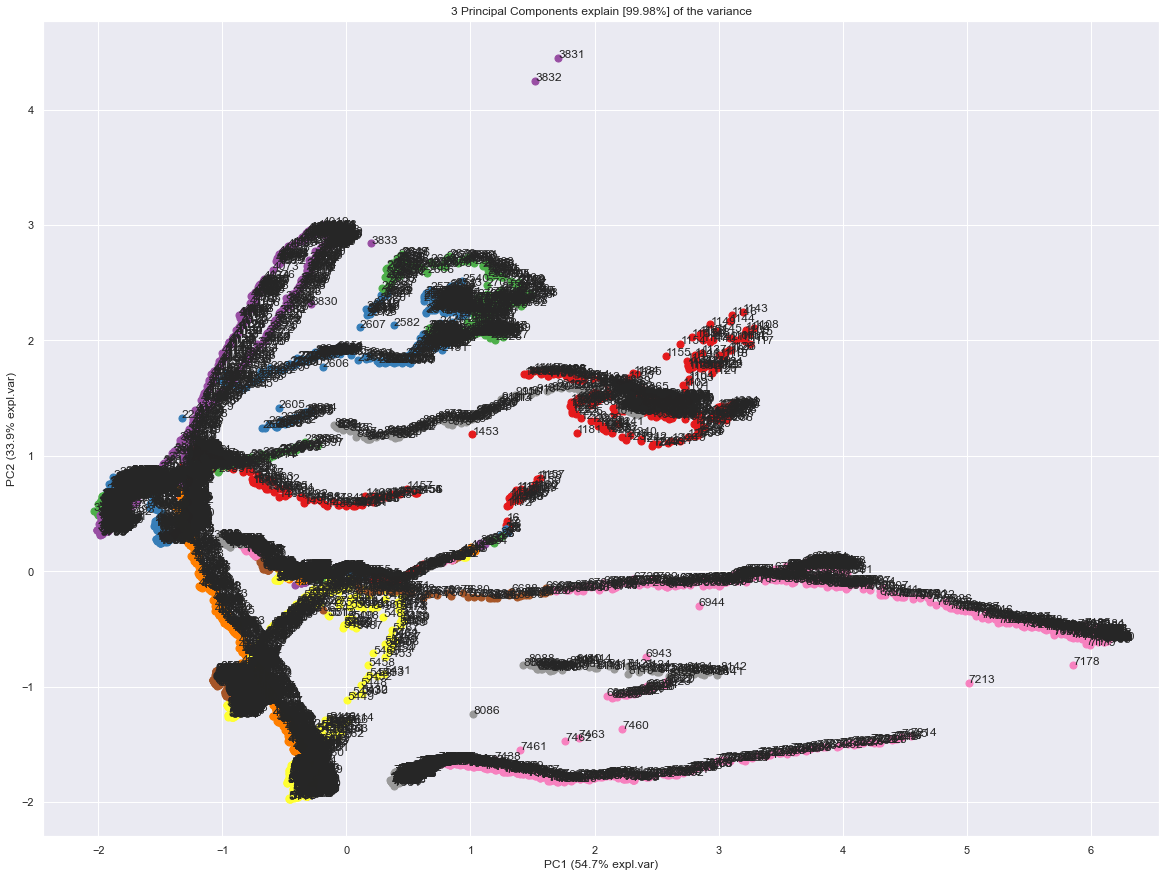

In [14]:
model.scatter(label=True, legend=False)

##### Eigenvectors

In [15]:
A = out['loadings'].T

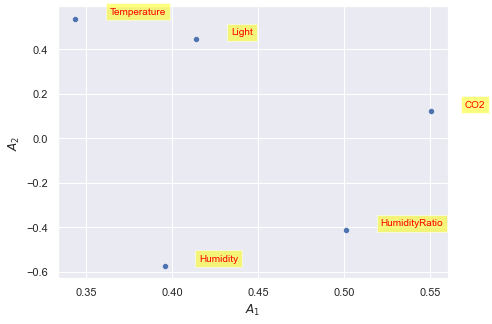

In [16]:
variables = list(df.columns)
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

##### Scree Plot

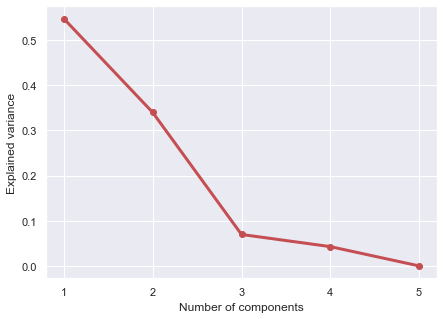

In [17]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

##### Explained Variance

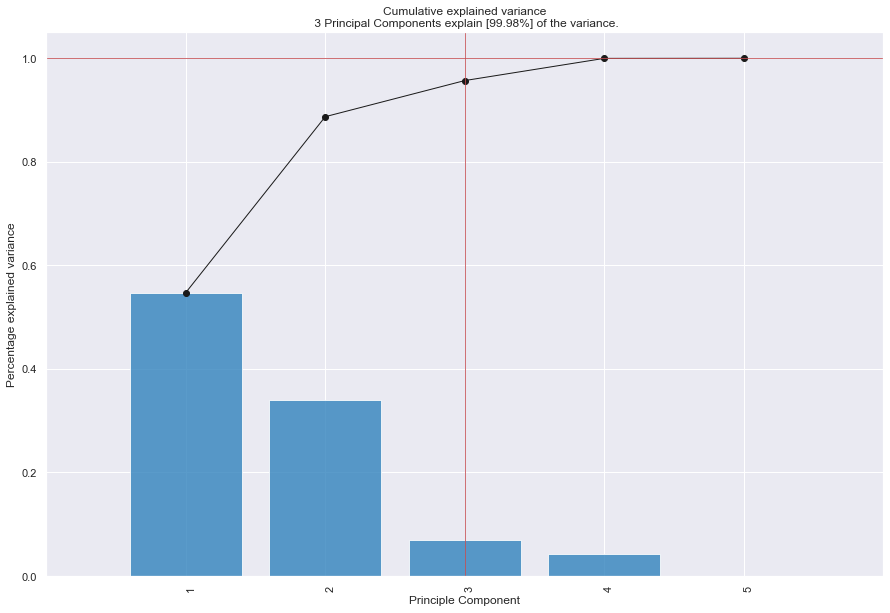

<Figure size 504x360 with 0 Axes>

In [18]:
model.plot();

##### BiPlot

In [ ]:
#model.biplot(label=False, legend=False)

In [ ]:
#model.biplot3d(legend=False)

### Classification

In [19]:
data=df
df1 = pd.read_csv('datatest.csv')
data_unseen = df1.drop(columns=["id","date"])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (8143, 6)
Unseen Data For Predictions: (2665, 6)


In [20]:
from pycaret.classification import *
clf = setup(data=data, target='Occupancy', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,Occupancy
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8143, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9939,0.9997,0.9865,0.9841,0.9852,0.9814,0.9814,0.2180
rf,Random Forest Classifier,0.9935,0.9993,0.9882,0.9808,0.9844,0.9803,0.9804,0.3260
lightgbm,Light Gradient Boosting Machine,0.9925,0.9992,0.9840,0.9799,0.9819,0.9771,0.9772,0.0700
ada,Ada Boost Classifier,0.9921,0.9988,0.9882,0.9743,0.9811,0.9761,0.9762,0.1180
gbc,Gradient Boosting Classifier,0.9921,0.9987,0.9856,0.9767,0.9811,0.9761,0.9762,0.2740
dt,Decision Tree Classifier,0.9905,0.9844,0.9738,0.9806,0.9771,0.9711,0.9712,0.0170
qda,Quadratic Discriminant Analysis,0.9879,0.9943,0.9949,0.9495,0.9716,0.9639,0.9644,0.0220
knn,K Neighbors Classifier,0.9877,0.9966,0.9873,0.9554,0.9710,0.9632,0.9635,0.9050
ridge,Ridge Classifier,0.9877,0.0000,1.0000,0.9447,0.9714,0.9636,0.9643,0.0170
lda,Linear Discriminant Analysis,0.9872,0.9930,1.0000,0.9424,0.9702,0.9621,0.9629,0.0180


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

Classifiers